## Data Analysis on Relationship between Obesity and Demographic and Socioeconomic Factors 

<a id="0"></a> <br>
 ## Table of Contents  
1. [Introduction](#1)     
    1. [Problem Definition](#2) 
    1. [Data description](#3)
1. [Data Understanding](#4)
1. [Data Preparation](#5) 
1. [Feature Understanding](#6) 
1. [Questions about the data](#7)    
    1. [Dependence of obesity on Gender](#8)   
    1. [Dependence of obesity on Income](#9)
    1. [Dependence of obesity on Education](#10)  
    1. [Dependence of obesity on Age](#11)    
    1. [Dependence of obesity on Ethnicity](#12)     
    1. [Dependence of obesity on a State (2021)](#13) 
    1. [Obesity over time](#14)        
1. [Summary](#15)


## 1. Introduction <a id="1"></a>
Obesity is a major public health concern in many parts of the world, including the United States. The prevalence of obesity has been linked to various factors such as gender, income level, education, age, ethnicity, and lifestyle factors.

### A. Problem Definition <a id="2"></a>
To better understand the relationship between obesity and these various factors, we conducted an exploratory data analysis. The analysis examined how obesity rates vary across different demographic groups and over the past 10 years (2011-2021). Additionally, compared obesity rates across different states in the United States to identify any meaningful differences. By doing so, I hope to shed light on the underlying factors that contribute to obesity and inform public health interventions and policies aimed at reducing obesity rates.

### B. Data description <a id="4"></a>
The dataset provided by Centers for Disease Control and Prevention (CDC) contains information on adult's diet, physical activity, and weight status. The data is collected from the Behavioral Risk Factor Surveillance System and is used for the DNPAO's Data, Trends, and Maps database, which provides national and state-specific data on obesity, nutrition, physical activity, and breastfeeding. <br/>
The dataset contains several variables, including demographic information, health behaviors, health status, and health care access. Some of the specific variables included: age, gender, race/ethnicity, education level, physical activity level, consumption of fruits and vegetables, and diabetes status. <br/>
This dataset is publicly available on the CDC's Chronic Data website: https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7

In [1]:
import pandas as pd 
import numpy as np
pd.options.display.max_columns = 100
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

## 2. Data Understanding <a id="4"></a>

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,30.6,30.6,NaN,NaN,29.4,31.8,31255.0,NaN,NaN,NaN,NaN,NaN,Hispanic,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,29.3,29.3,NaN,NaN,25.7,33.3,842.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,28.8,28.8,NaN,NaN,28.1,29.5,62562.0,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.7,32.7,NaN,NaN,31.9,33.5,60069.0,NaN,NaN,NaN,NaN,Data not reported,NaN,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,26.6,26.6,NaN,NaN,25.6,27.6,30904.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   88629 non-null  int64  
 1   YearEnd                     88629 non-null  int64  
 2   LocationAbbr                88629 non-null  object 
 3   LocationDesc                88629 non-null  object 
 4   Datasource                  88629 non-null  object 
 5   Class                       88629 non-null  object 
 6   Topic                       88629 non-null  object 
 7   Question                    88629 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             88629 non-null  object 
 10  Data_Value                  79851 non-null  float64
 11  Data_Value_Alt              79851 non-null  float64
 12  Data_Value_Footnote_Symbol  8778 non-null   object 
 13  Data_Value_Footnote         877

In [5]:
# Basic statistics
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,88629.000000,88629.000000,0.0,79851.000000,79851.000000,79851.000000,79851.000000,79851.000000,88629.000000
mean,2016.011362,2016.011362,NaN,31.236493,31.236493,26.907732,36.135953,3656.809044,30.906475
std,3.121080,3.121080,NaN,10.113829,10.113829,9.907896,11.061591,18706.392637,17.485456
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2013.000000,2013.000000,NaN,24.300000,24.300000,20.000000,28.600000,516.000000,17.000000
50%,2016.000000,2016.000000,NaN,31.200000,31.200000,26.800000,35.900000,1109.000000,30.000000
75%,2019.000000,2019.000000,NaN,37.000000,37.000000,32.900000,42.200000,2408.000000,45.000000
max,2021.000000,2021.000000,NaN,77.600000,77.600000,70.200000,87.700000,476876.000000,78.000000


## 3. Data Preperation <a id="5"></a>

In [6]:
# Data Selection for EDA
df = df[['YearStart', 
        #'YearEnd', 
        'LocationAbbr', 
        'LocationDesc', 
        #'Datasource', 'Class', 'Topic', 
        'Question', 
        #'Data_Value_Unit', 'Data_Value_Type',
        'Data_Value', 
        #'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
        #'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
        #'Sample_Size', 
        #'Total', 
        'Age(years)', 'Education', 'Gender', 'Income',
        'Race/Ethnicity', 
        'GeoLocation', 
        #'ClassID', 
        #'TopicID', 'QuestionID',
        #'DataValueTypeID', 
        'LocationID', 
        #'StratificationCategory1',
        #'Stratification1', 'StratificationCategoryId1', 'StratificationID1'
        ]].copy()

In [7]:
df = df.rename(columns= {'Age(years)': 'Age_Years',
                        'Race/Ethnicity': 'Race_Ethnicity'},)

In [8]:
#Check for duplicate variables
df.duplicated().sum()

0

In [9]:
#checking missing value in the columns
df.isna().sum()

YearStart             0
LocationAbbr          0
LocationDesc          0
Question              0
Data_Value         8778
Age_Years         69639
Education         75969
Gender            82299
Income            66474
Race_Ethnicity    63309
GeoLocation        1652
LocationID            0
dtype: int64

## 4. Feature Understanding <a id="6"></a>

In [10]:
df['Question'] = df['Question'].astype('category')
df['Income'] = df['Income'].astype('category')

df['Question'] = df['Question'].cat.rename_categories({'Percent of adults aged 18 years and older who have obesity': 0, 
                                                                           'Percent of adults aged 18 years and older who have an overweight classification': 1,
                                                                           'Percent of adults who engage in no leisure-time physical activity': 2,
                                                                           'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 3,
                                                                           'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week': 4,
                                                                           'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 5,
                                                                           'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week': 6,
                                                                           'Percent of adults who report consuming fruit less than one time daily': 7,
                                                                           'Percent of adults who report consuming vegetables less than one time daily': 8
                                                                           })
df['Income'] = df['Income'].cat.rename_categories({'Less than $15,000':'Less_than_15,000', '$15,000 - $24,999':'15,000-24,999', 
                                                                       '$25,000 - $34,999': '25,000-34,999', '$35,000 - $49,999': '35,000-49,999', 
                                                                       '$50,000 - $74,999': '50,000-74,999', '$75,000 or greater': '75,000_or_greater', 
                                                                       'Data not reported': 'Data_not_reported'})

graph for YearStart: total = 11


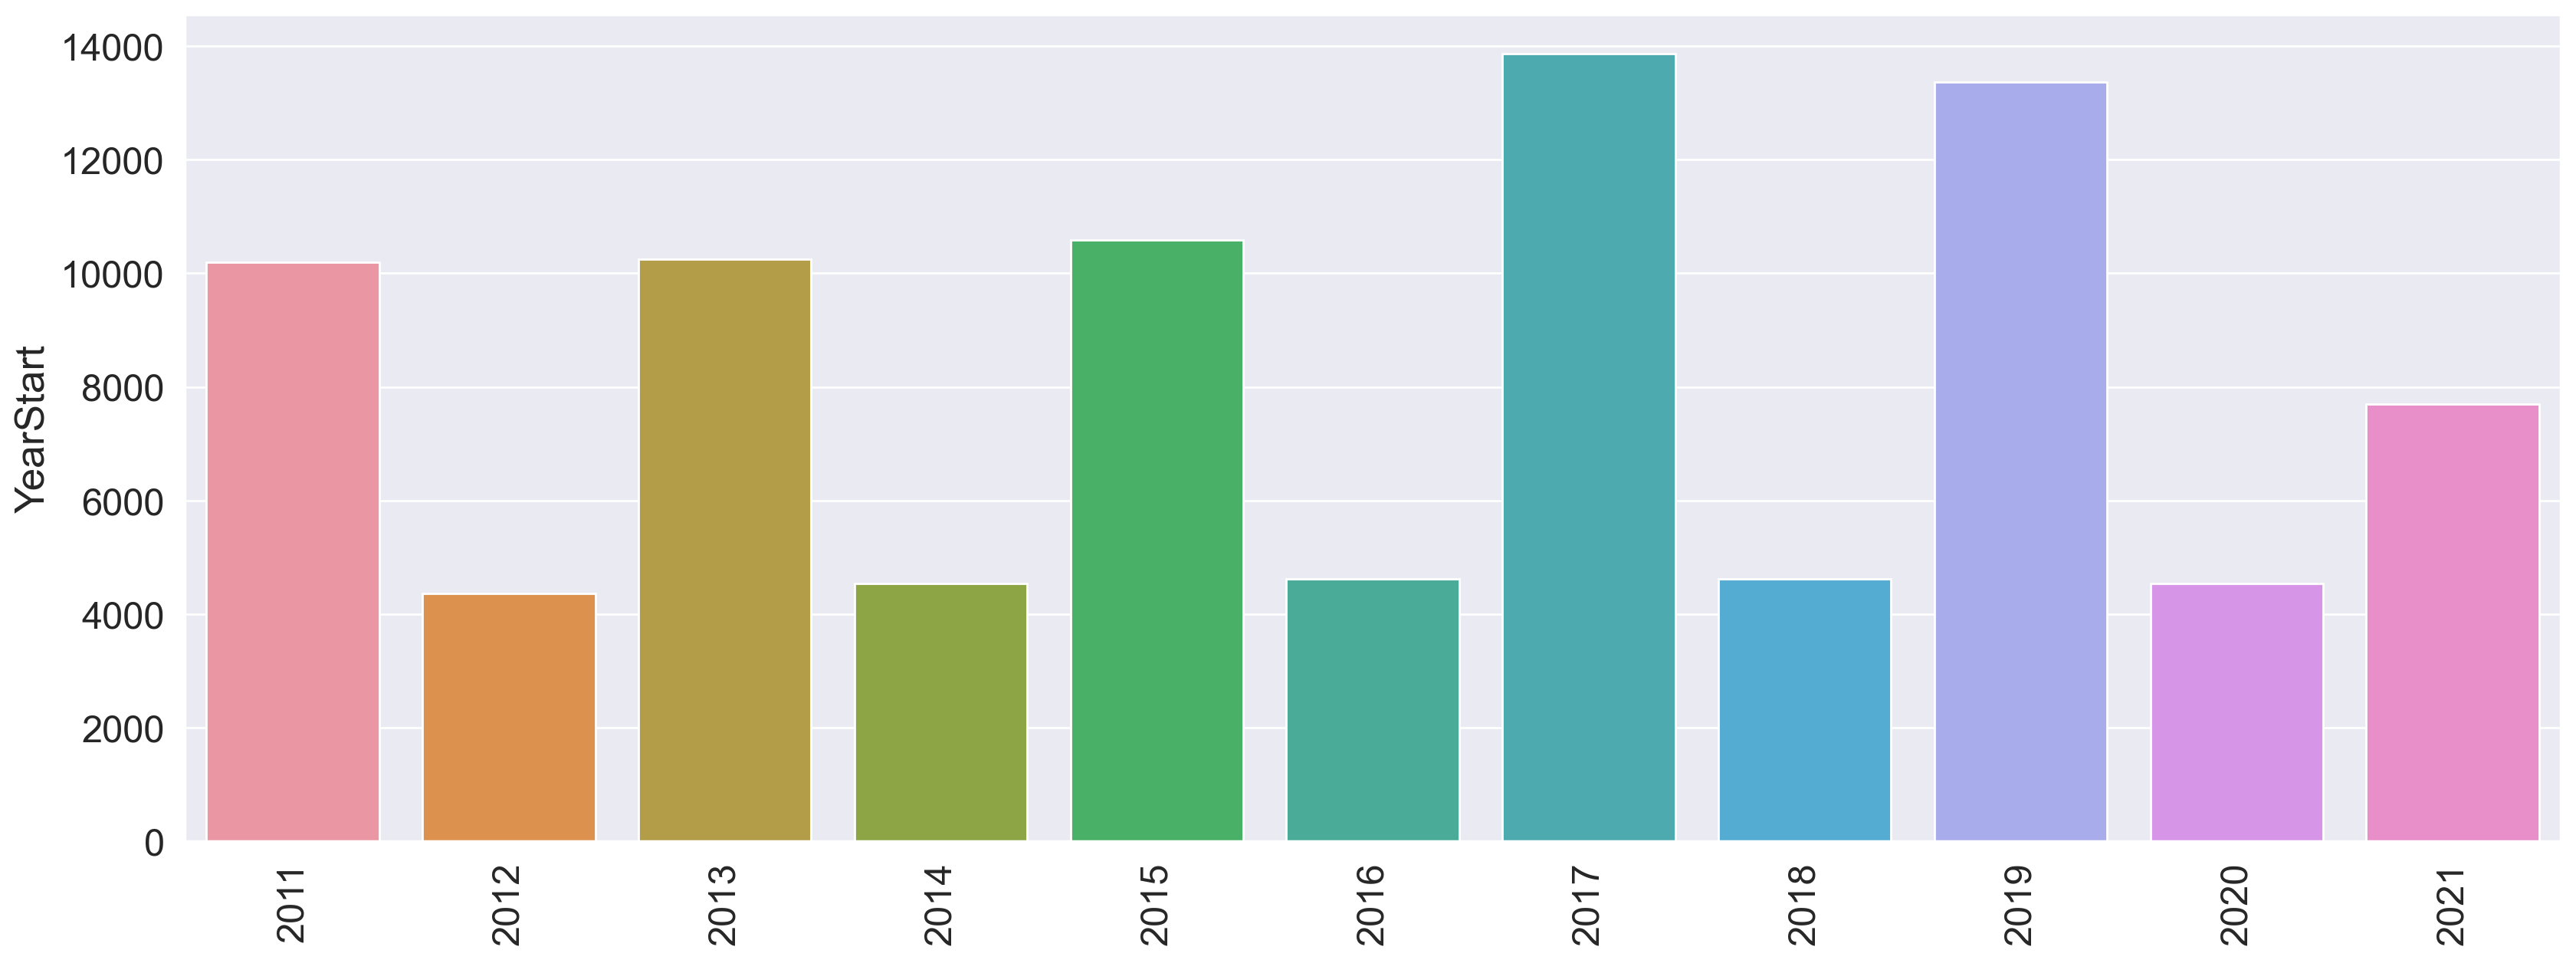

graph for LocationAbbr: total = 55


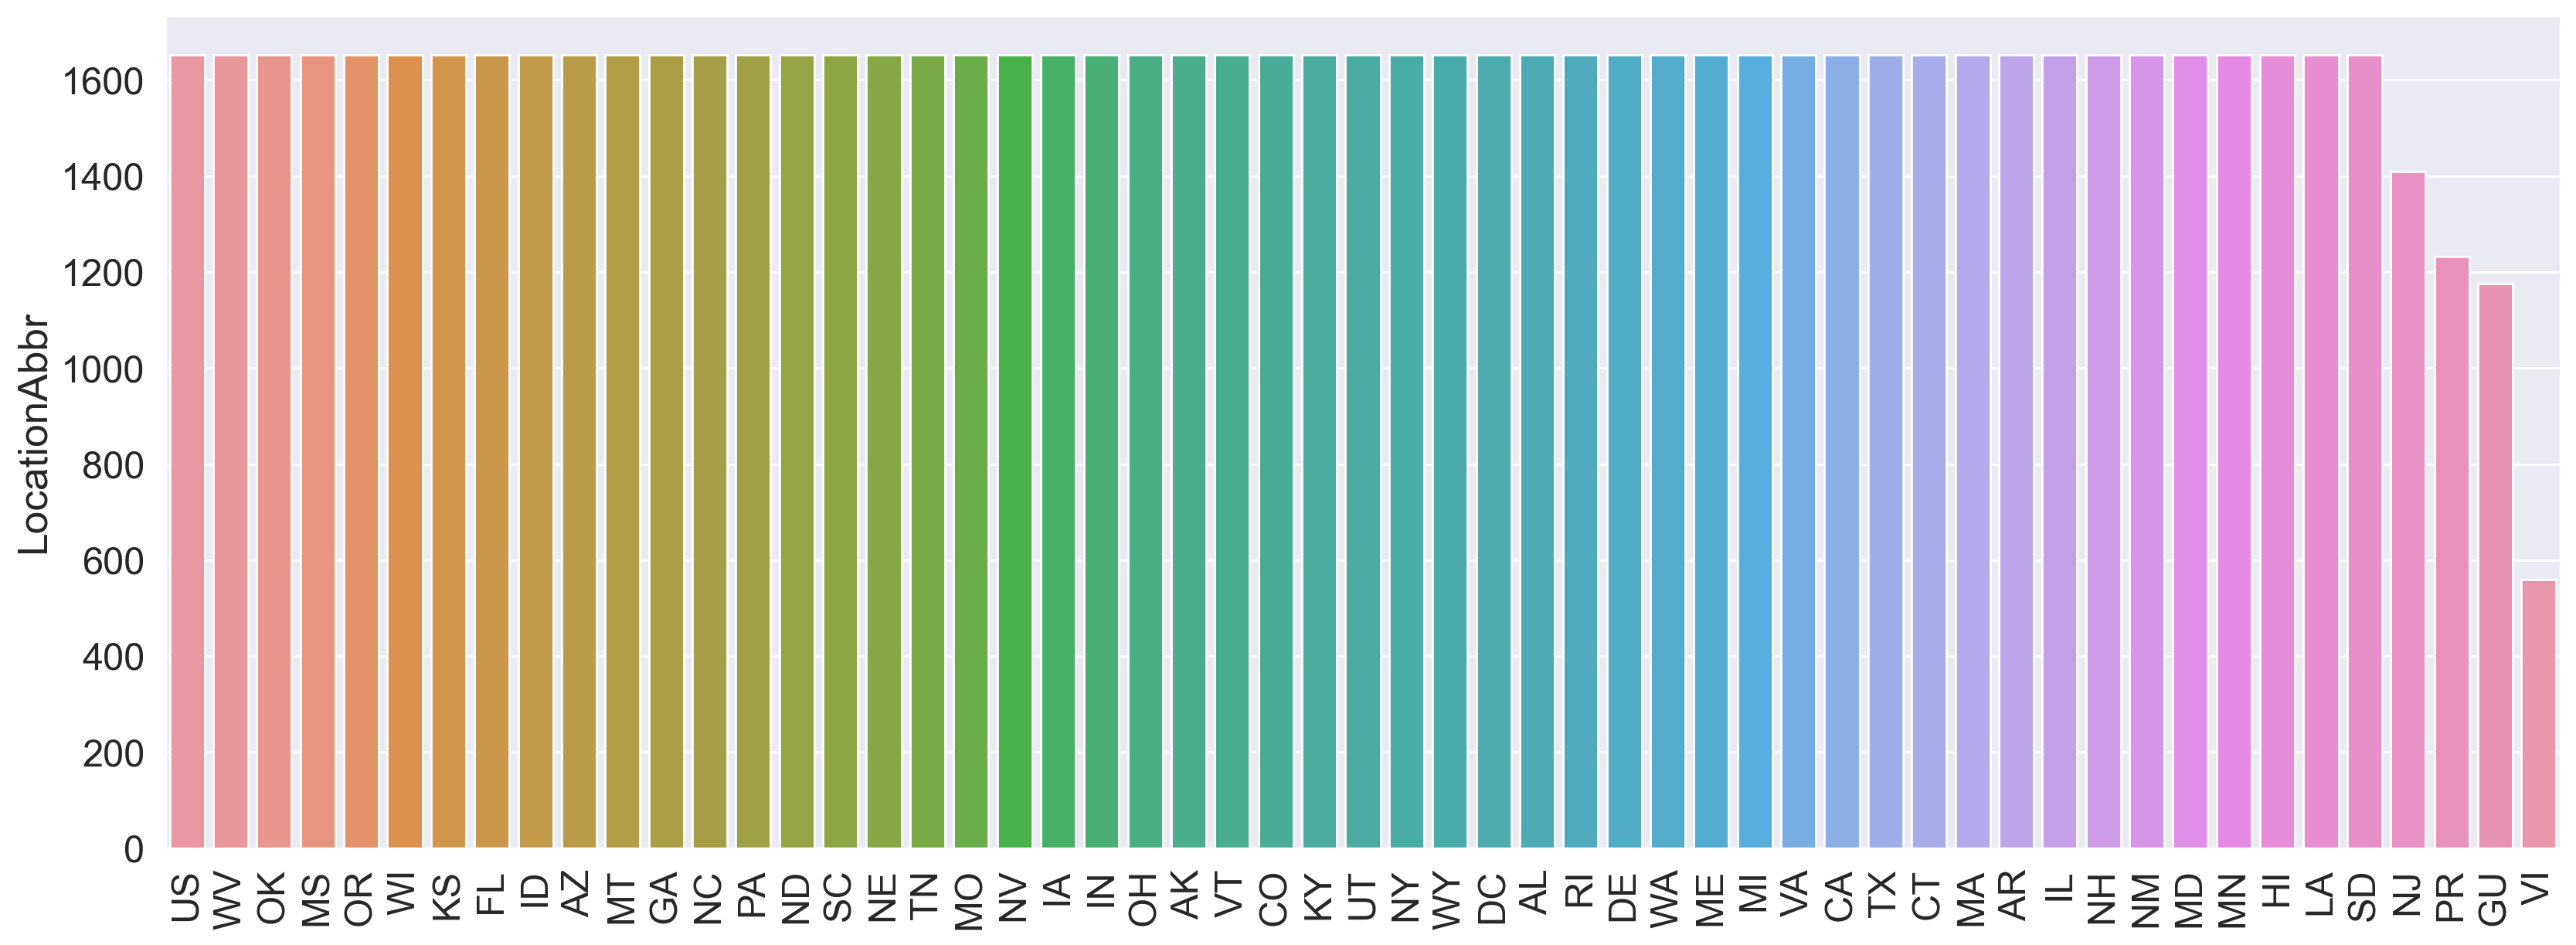

graph for Age_Years: total = 6


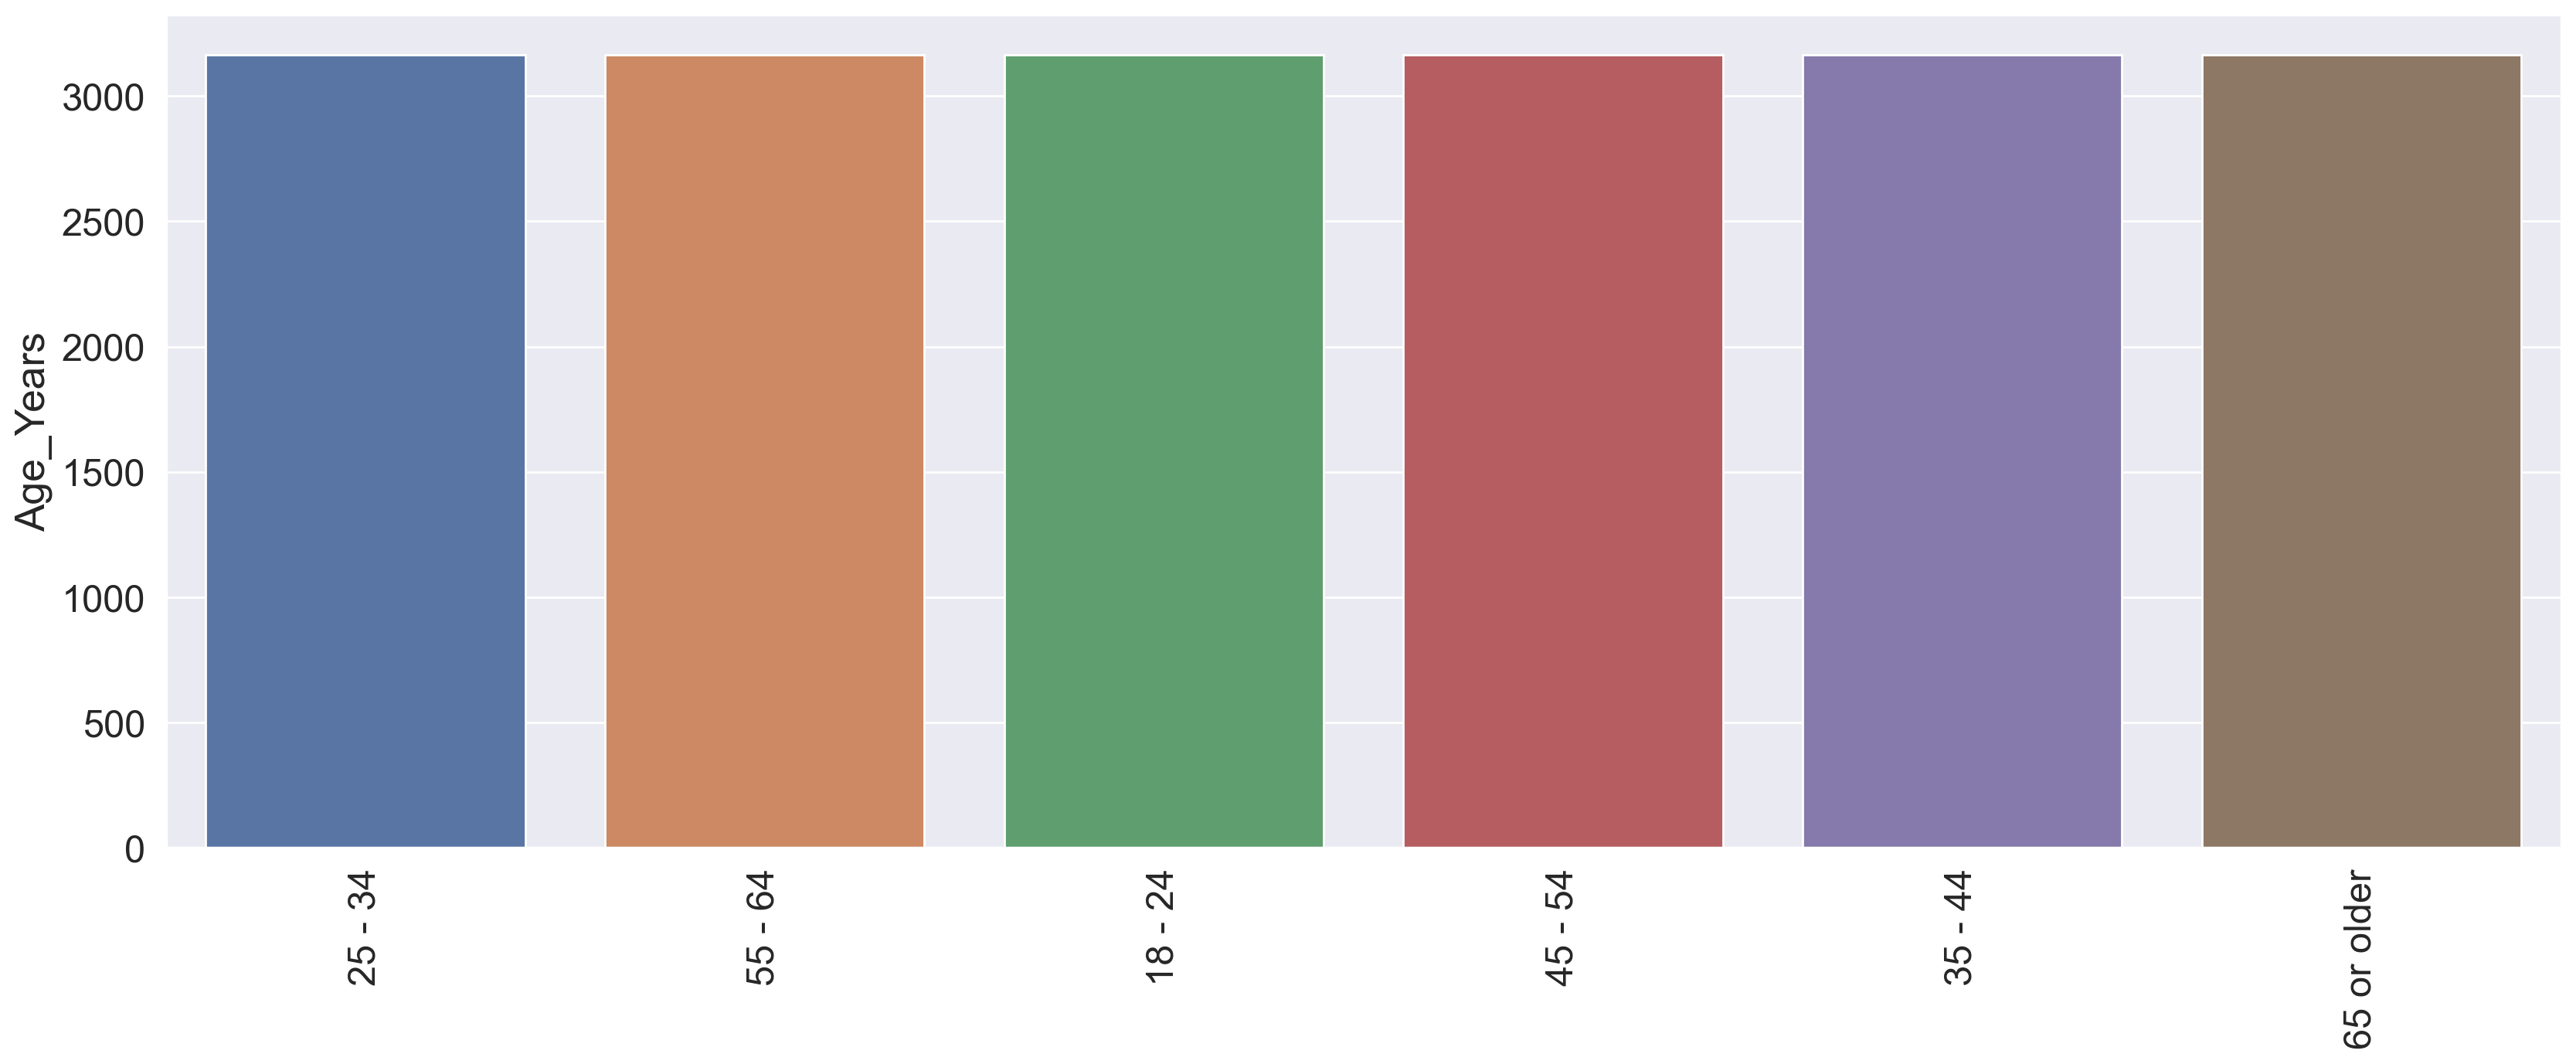

graph for Education: total = 4


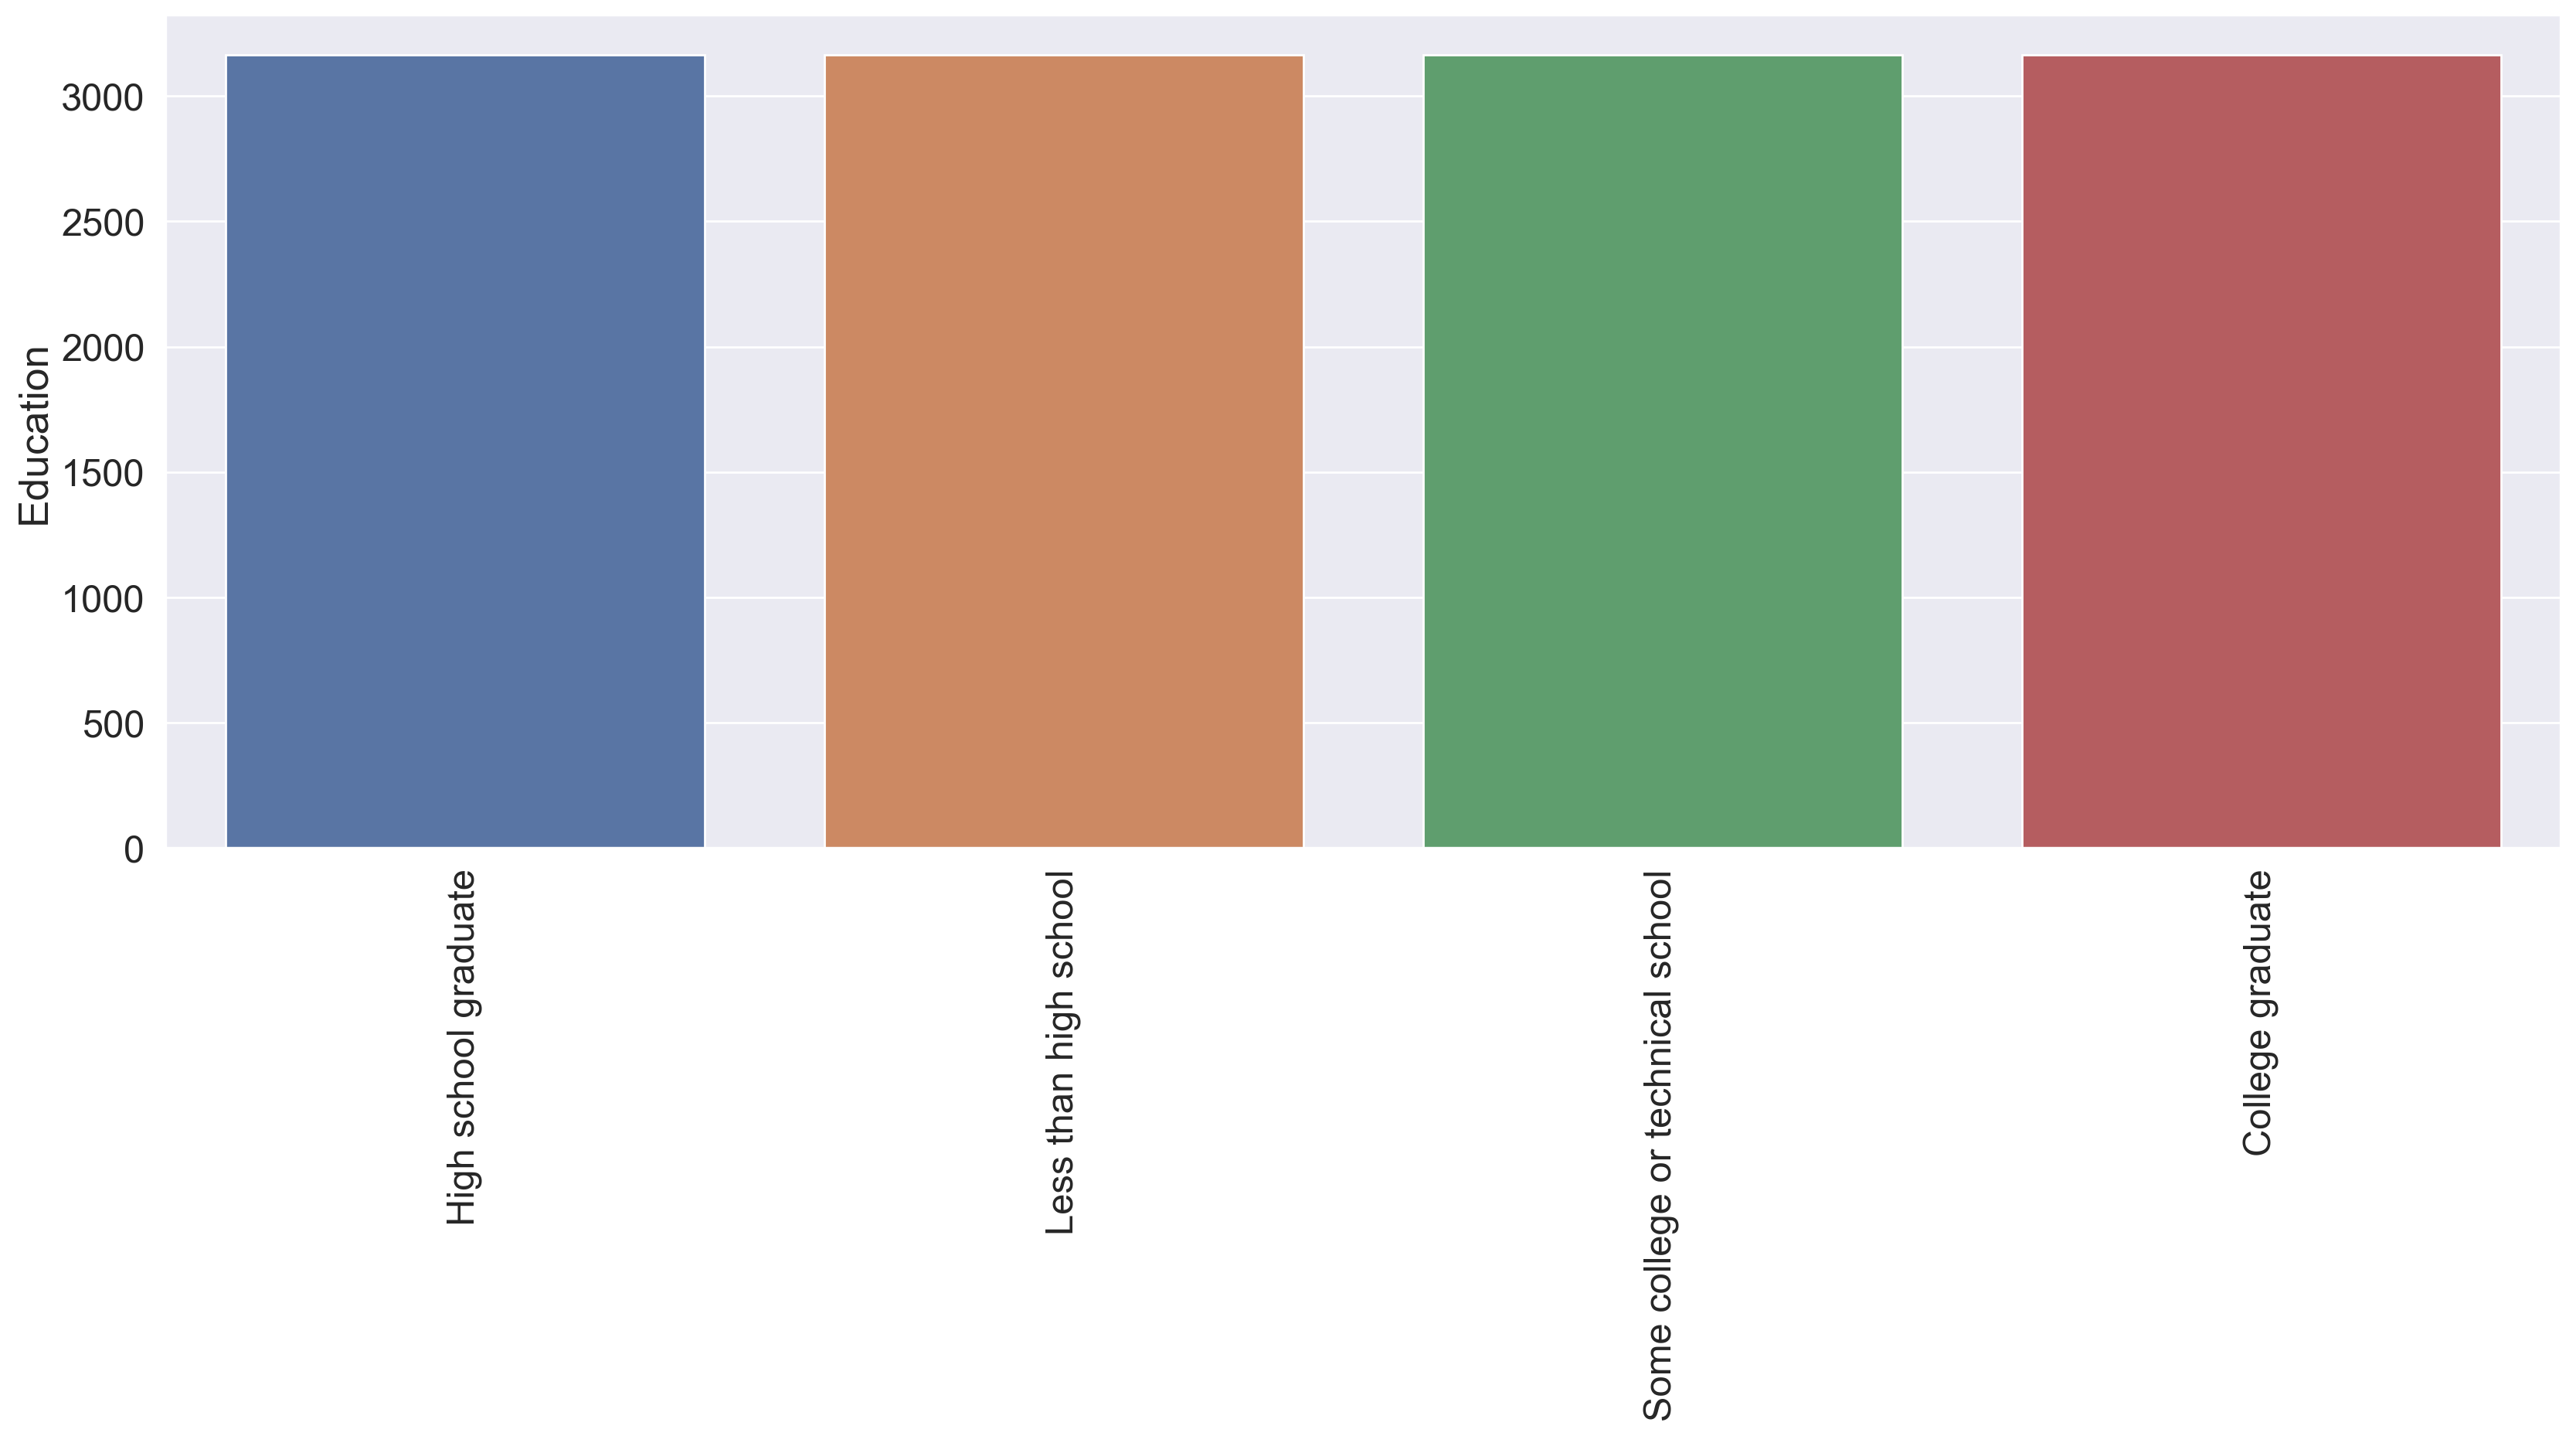

graph for Gender: total = 2


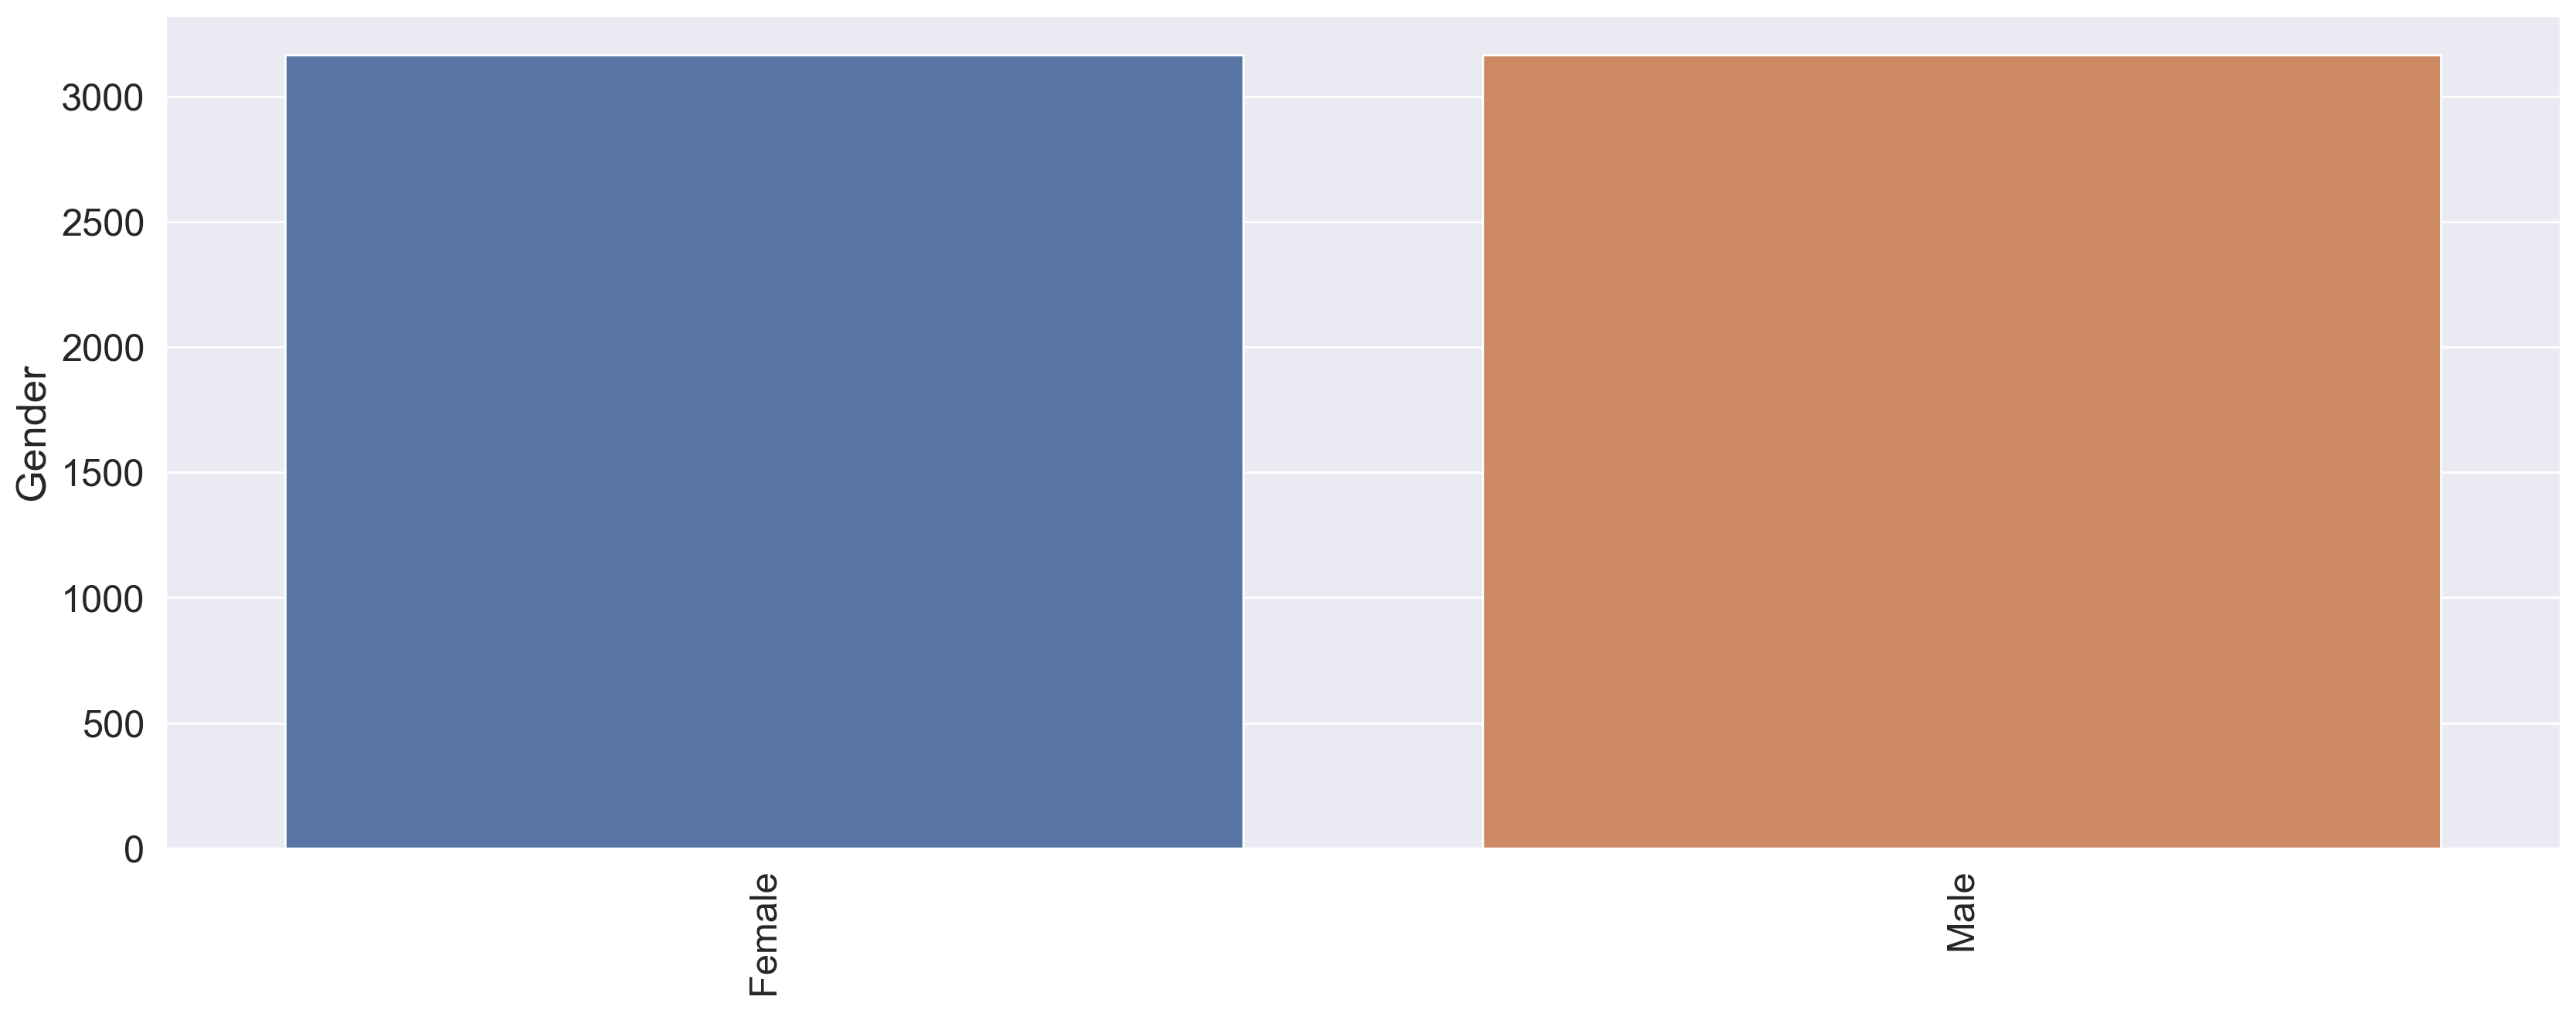

graph for Income: total = 7


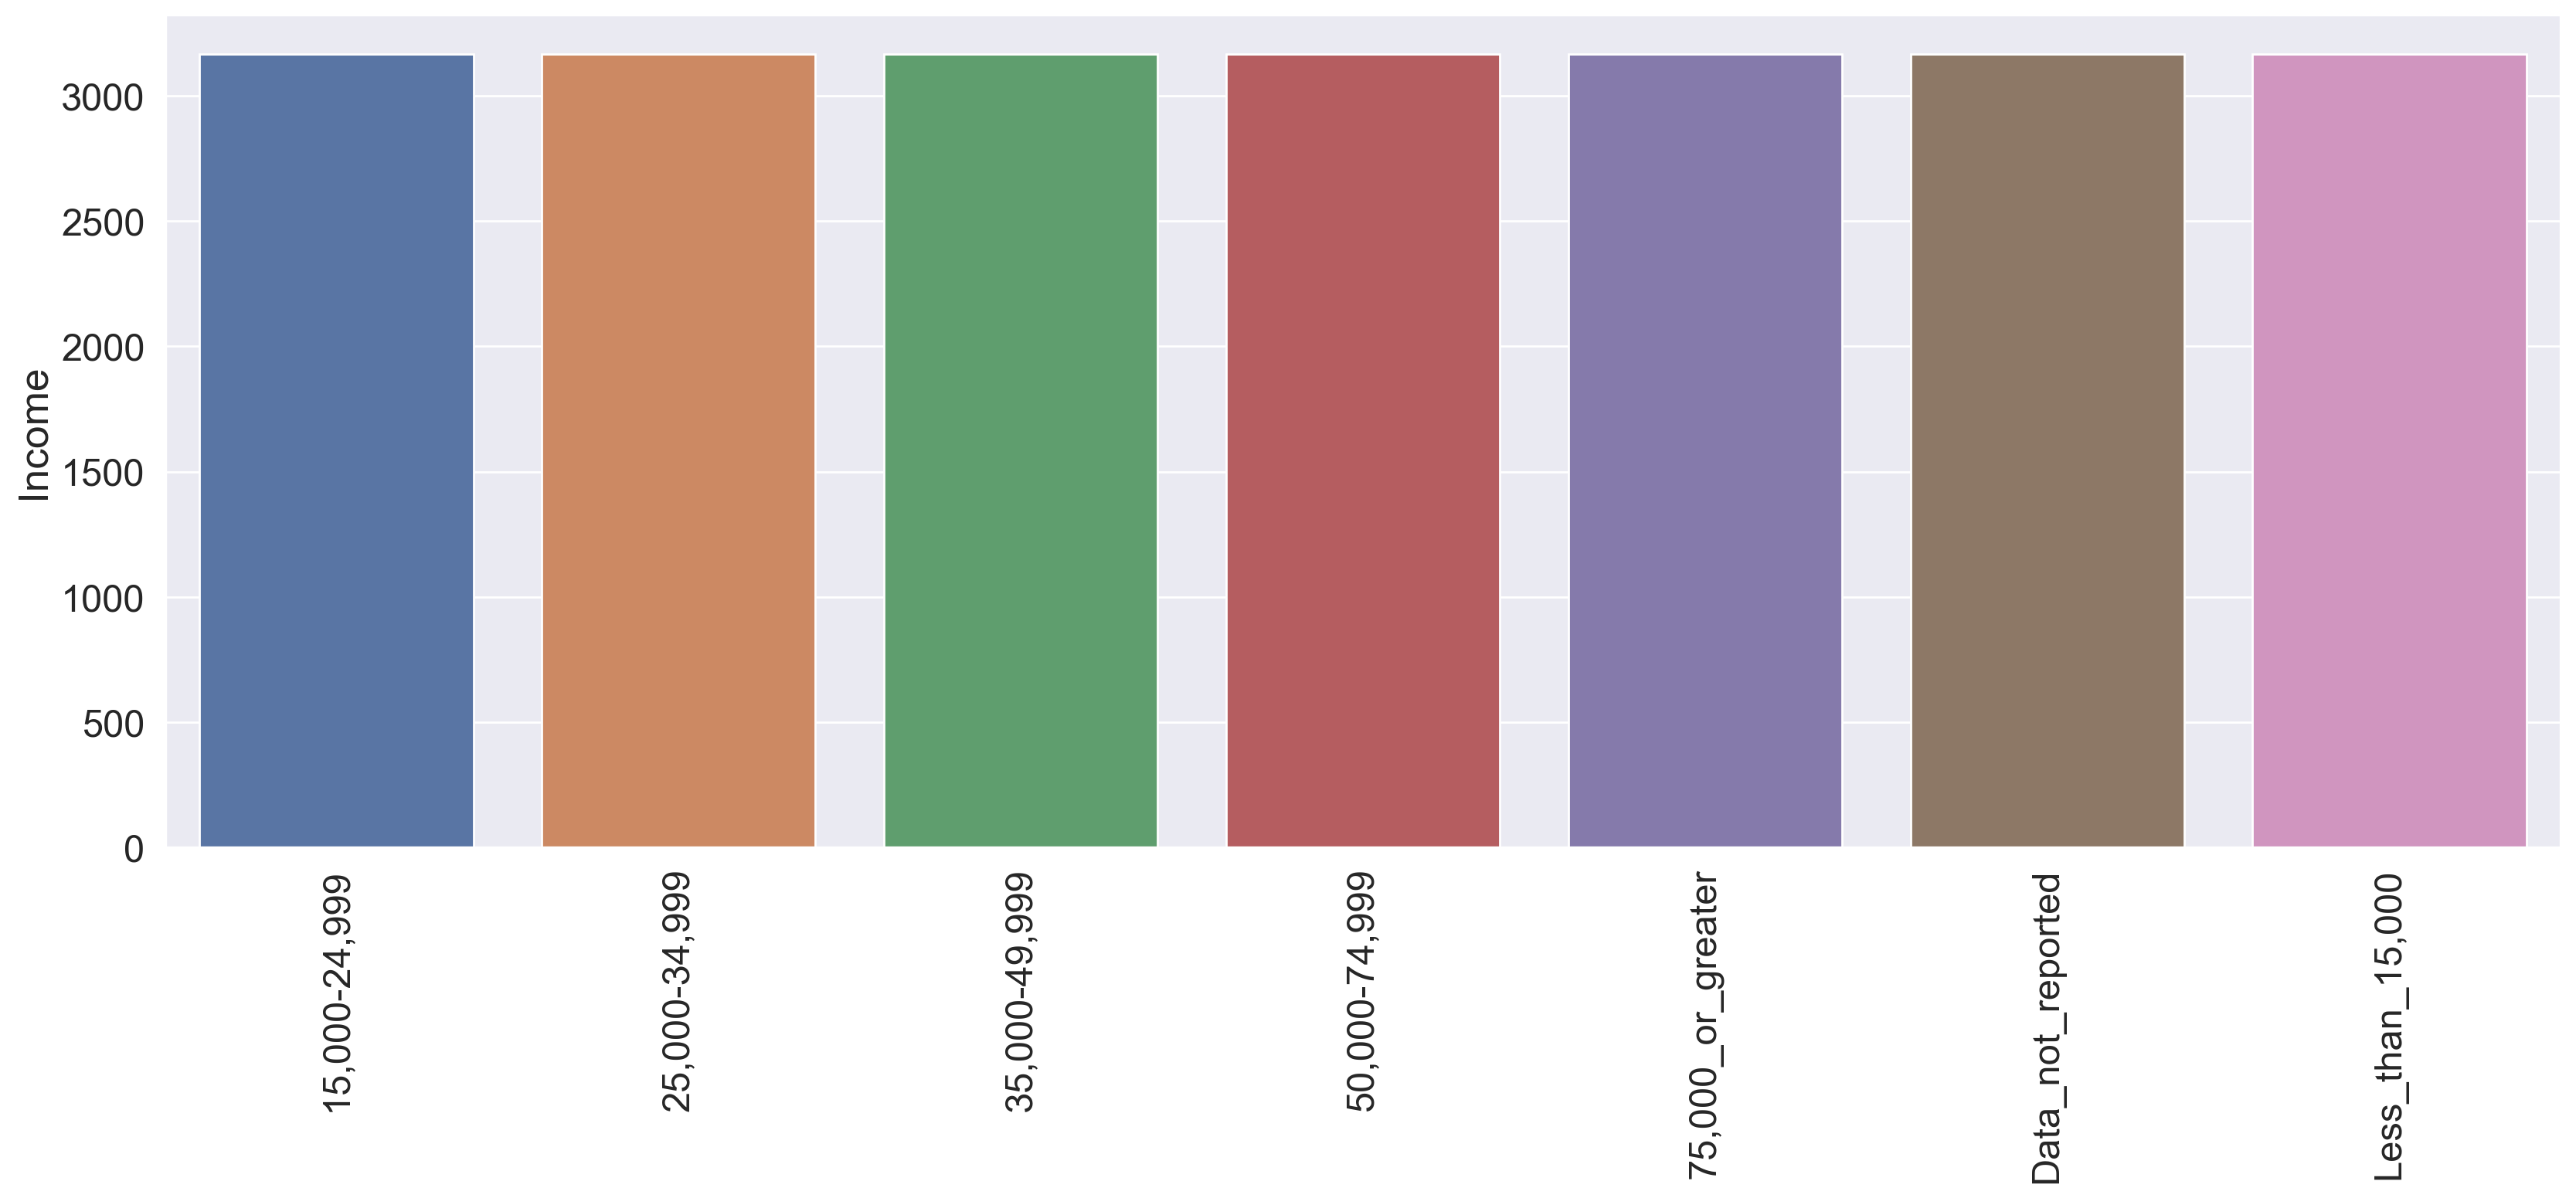

graph for Race_Ethnicity: total = 8


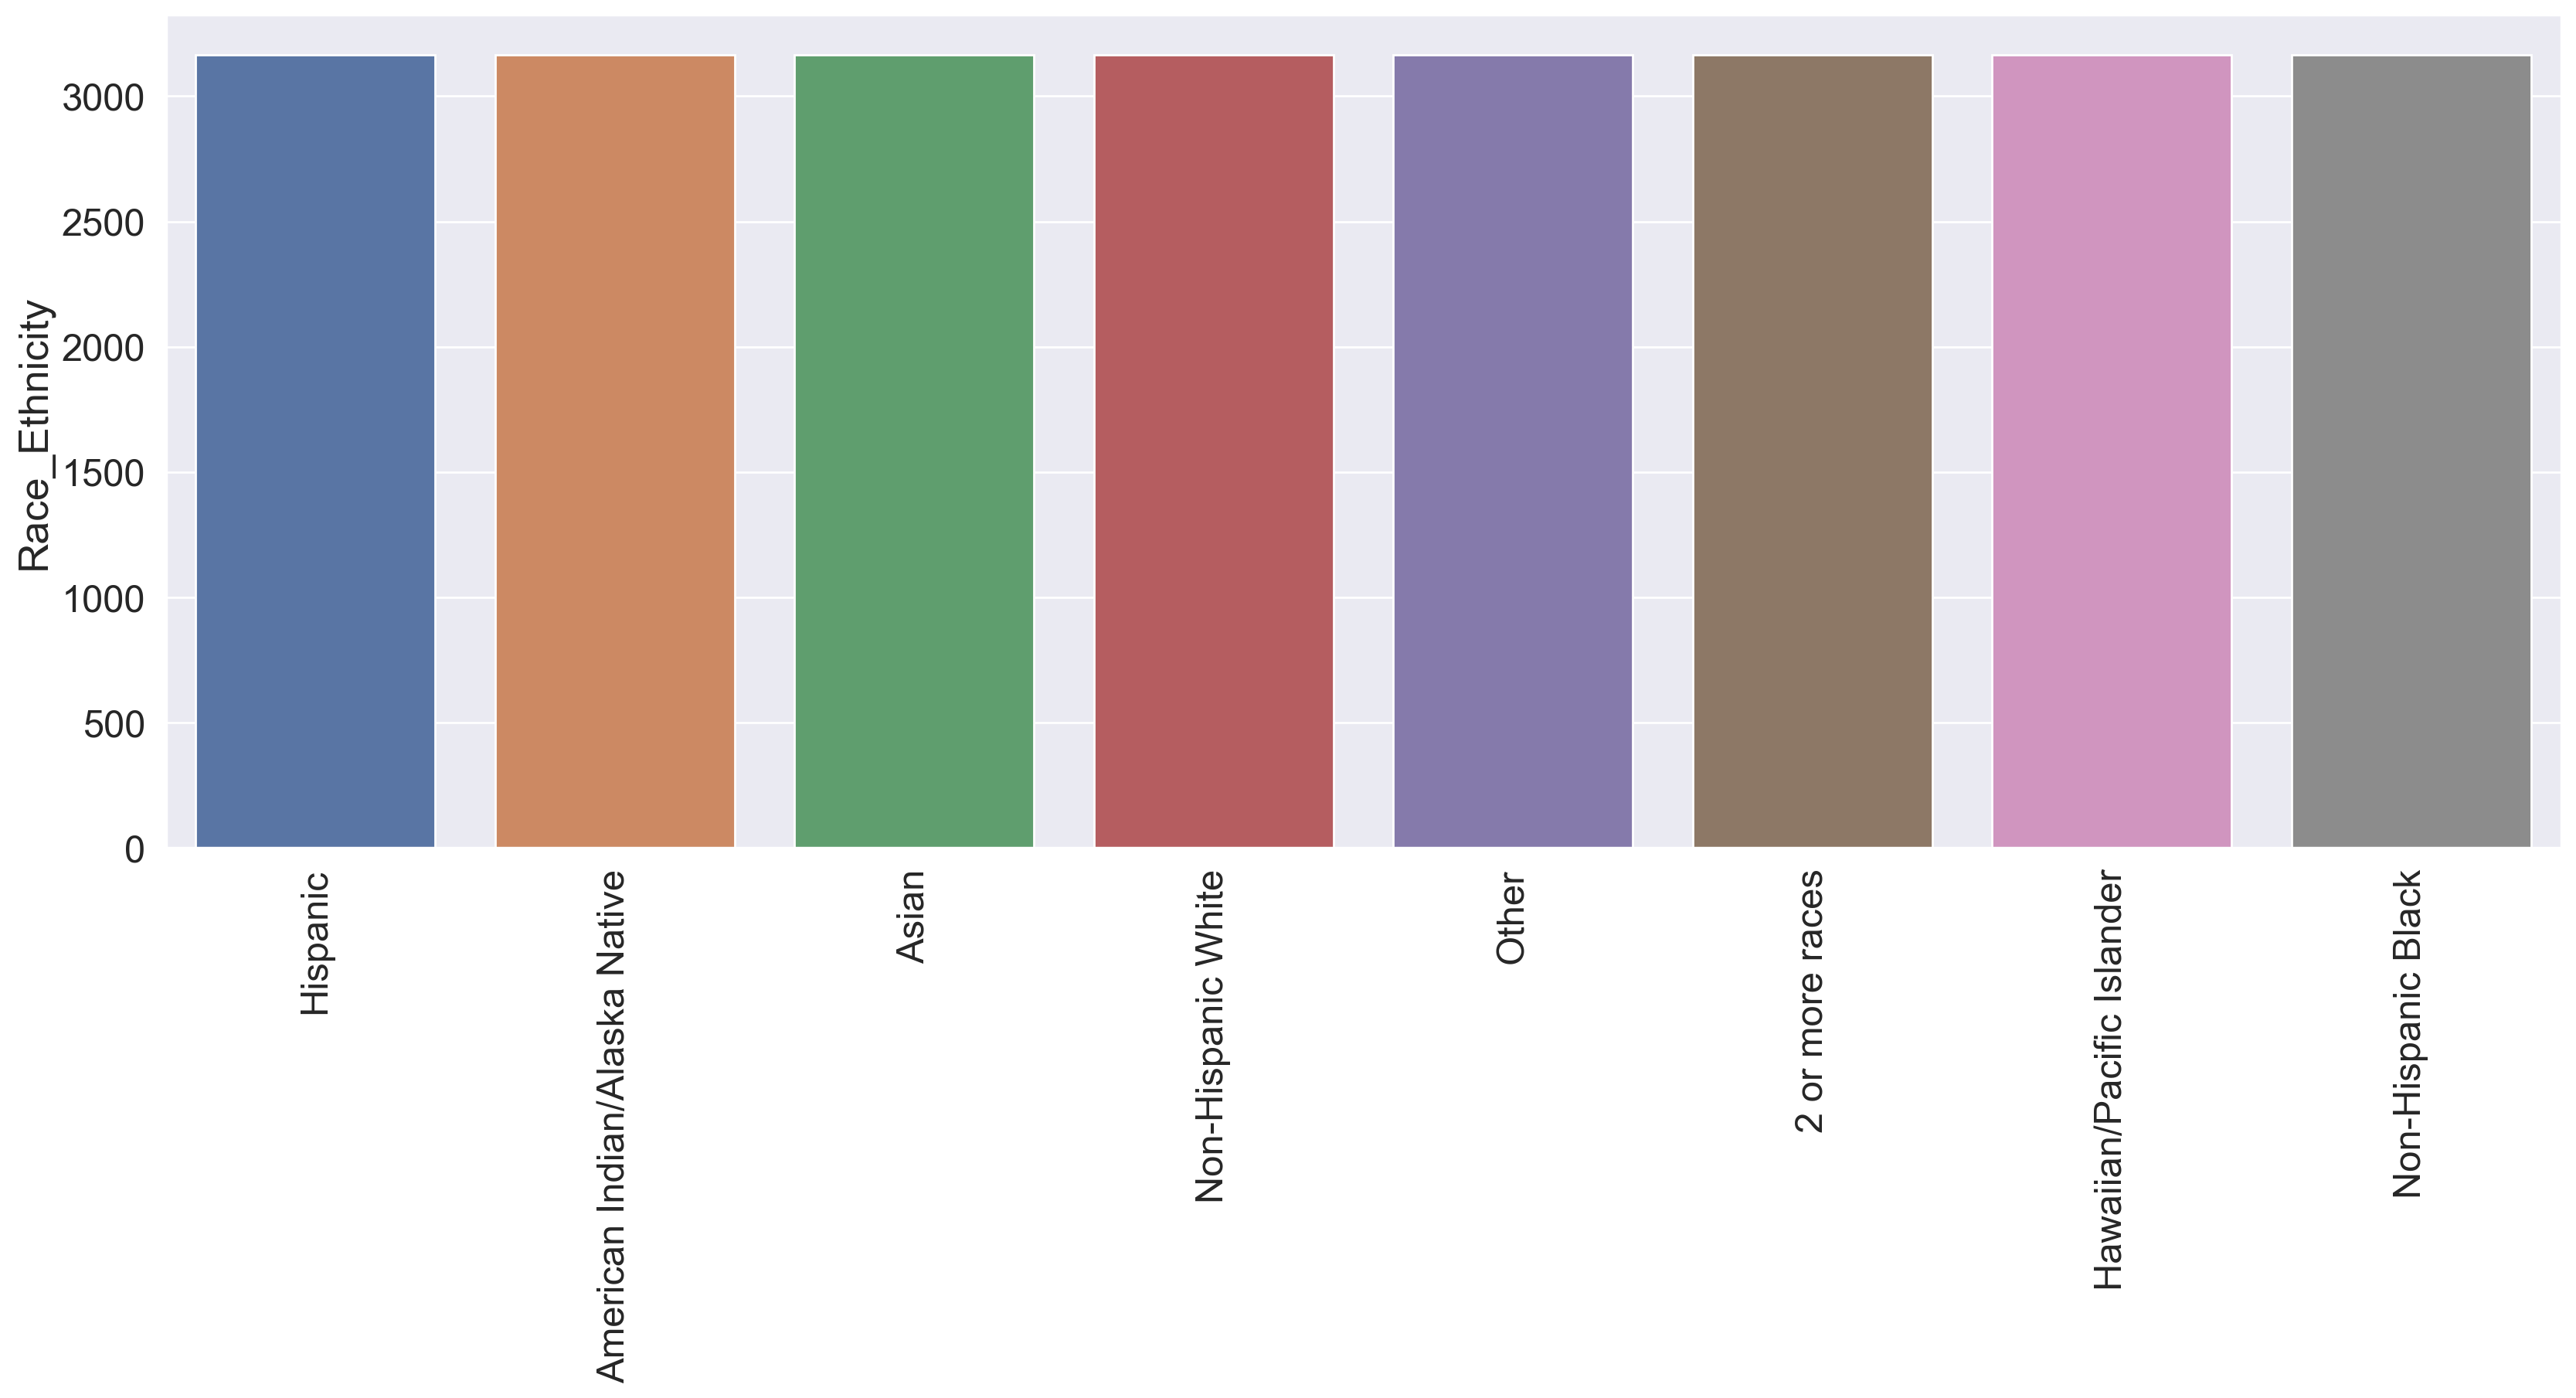

graph for Question: total = 9


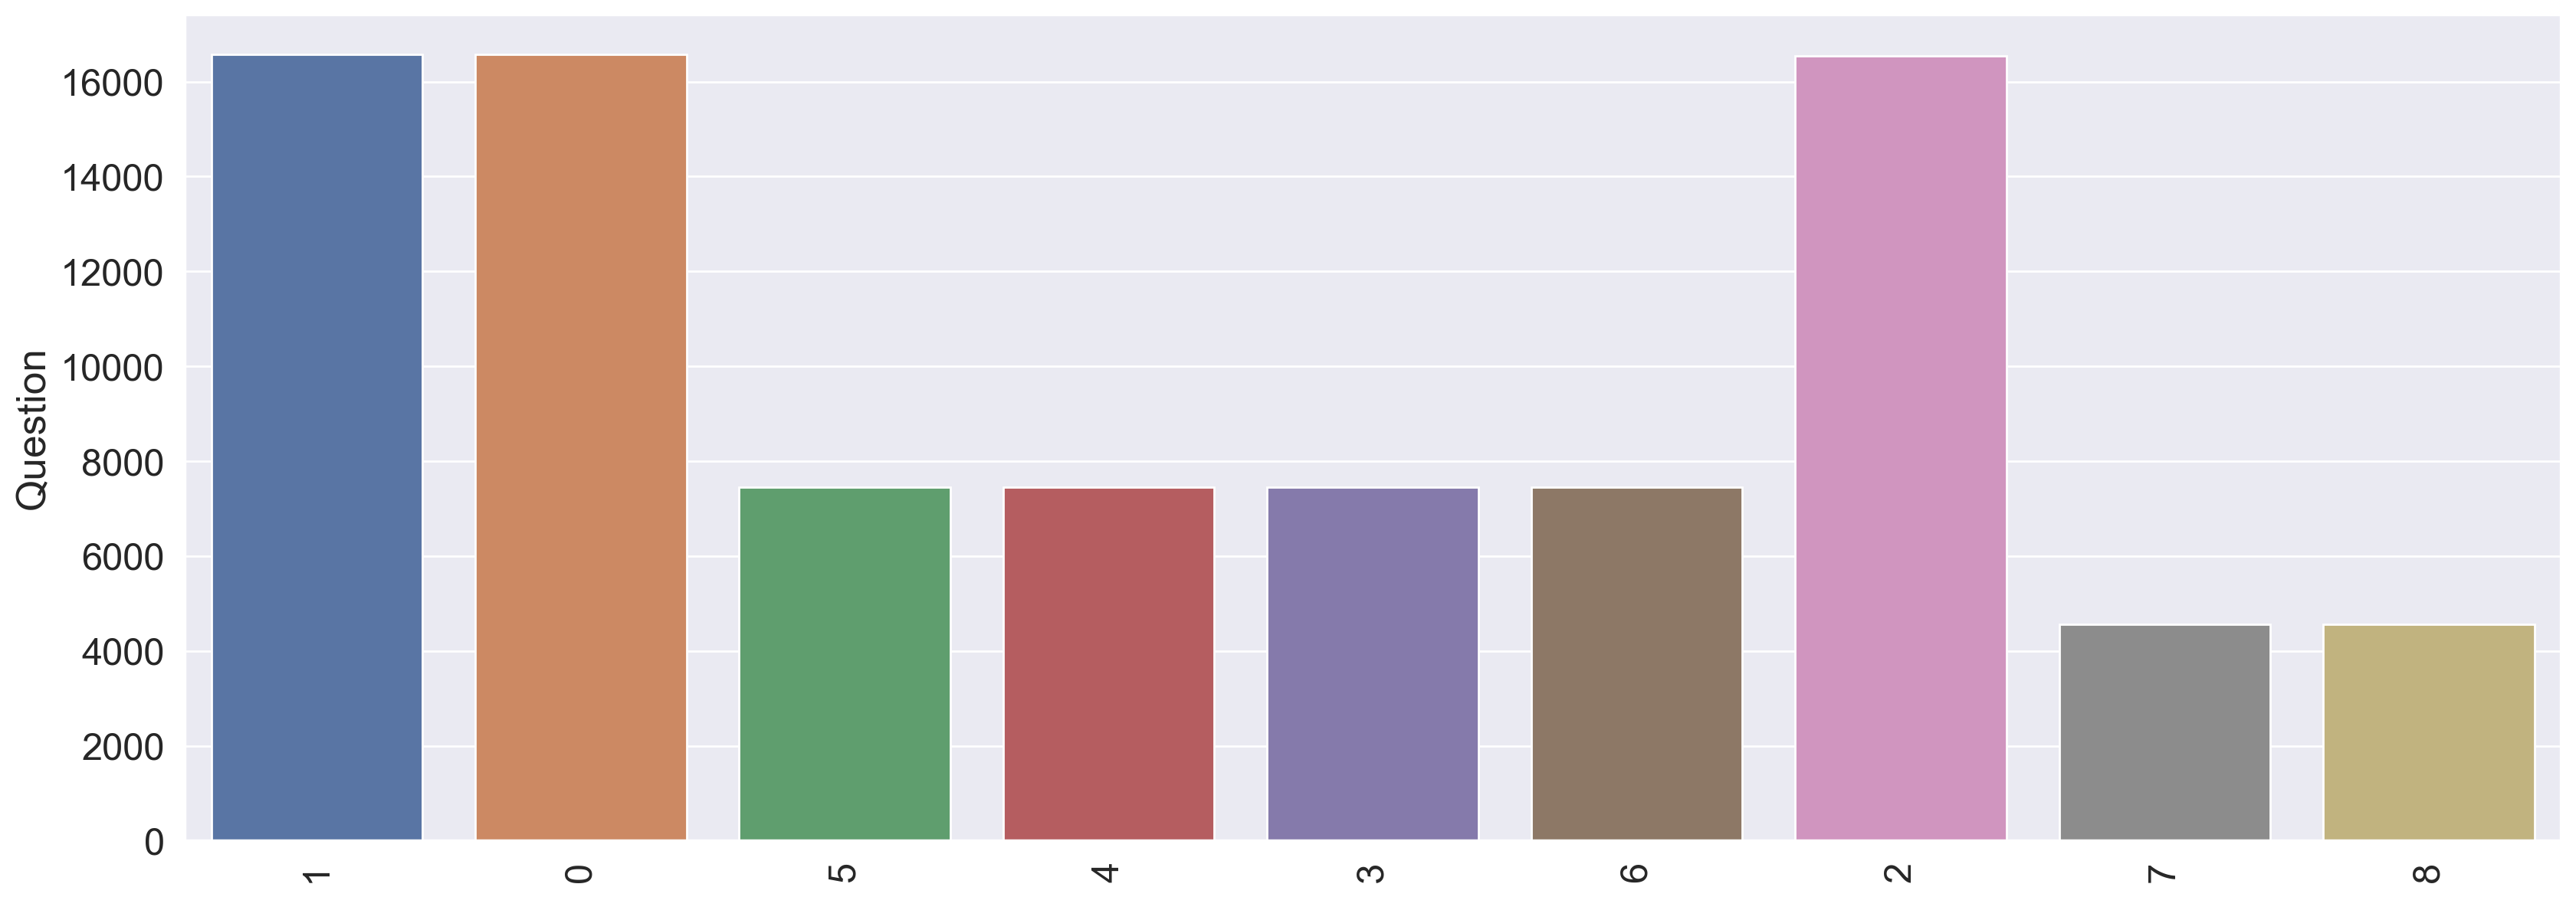

In [11]:
for i in ['YearStart', 'LocationAbbr', 'Age_Years', 
       'Education', 'Gender', 'Income', 'Race_Ethnicity', 'Question']:
    df_v = df[i].value_counts()
    print("graph for %s: total = %d" % (i, len(df_v)))
    chart = sns.set(rc={"figure.dpi":200})
    plt.figure(figsize=(20,7))
    sns.set(font_scale=1.6)
    chart = sns.barplot(x=df_v.index, y=df_v)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    
    plt.show()

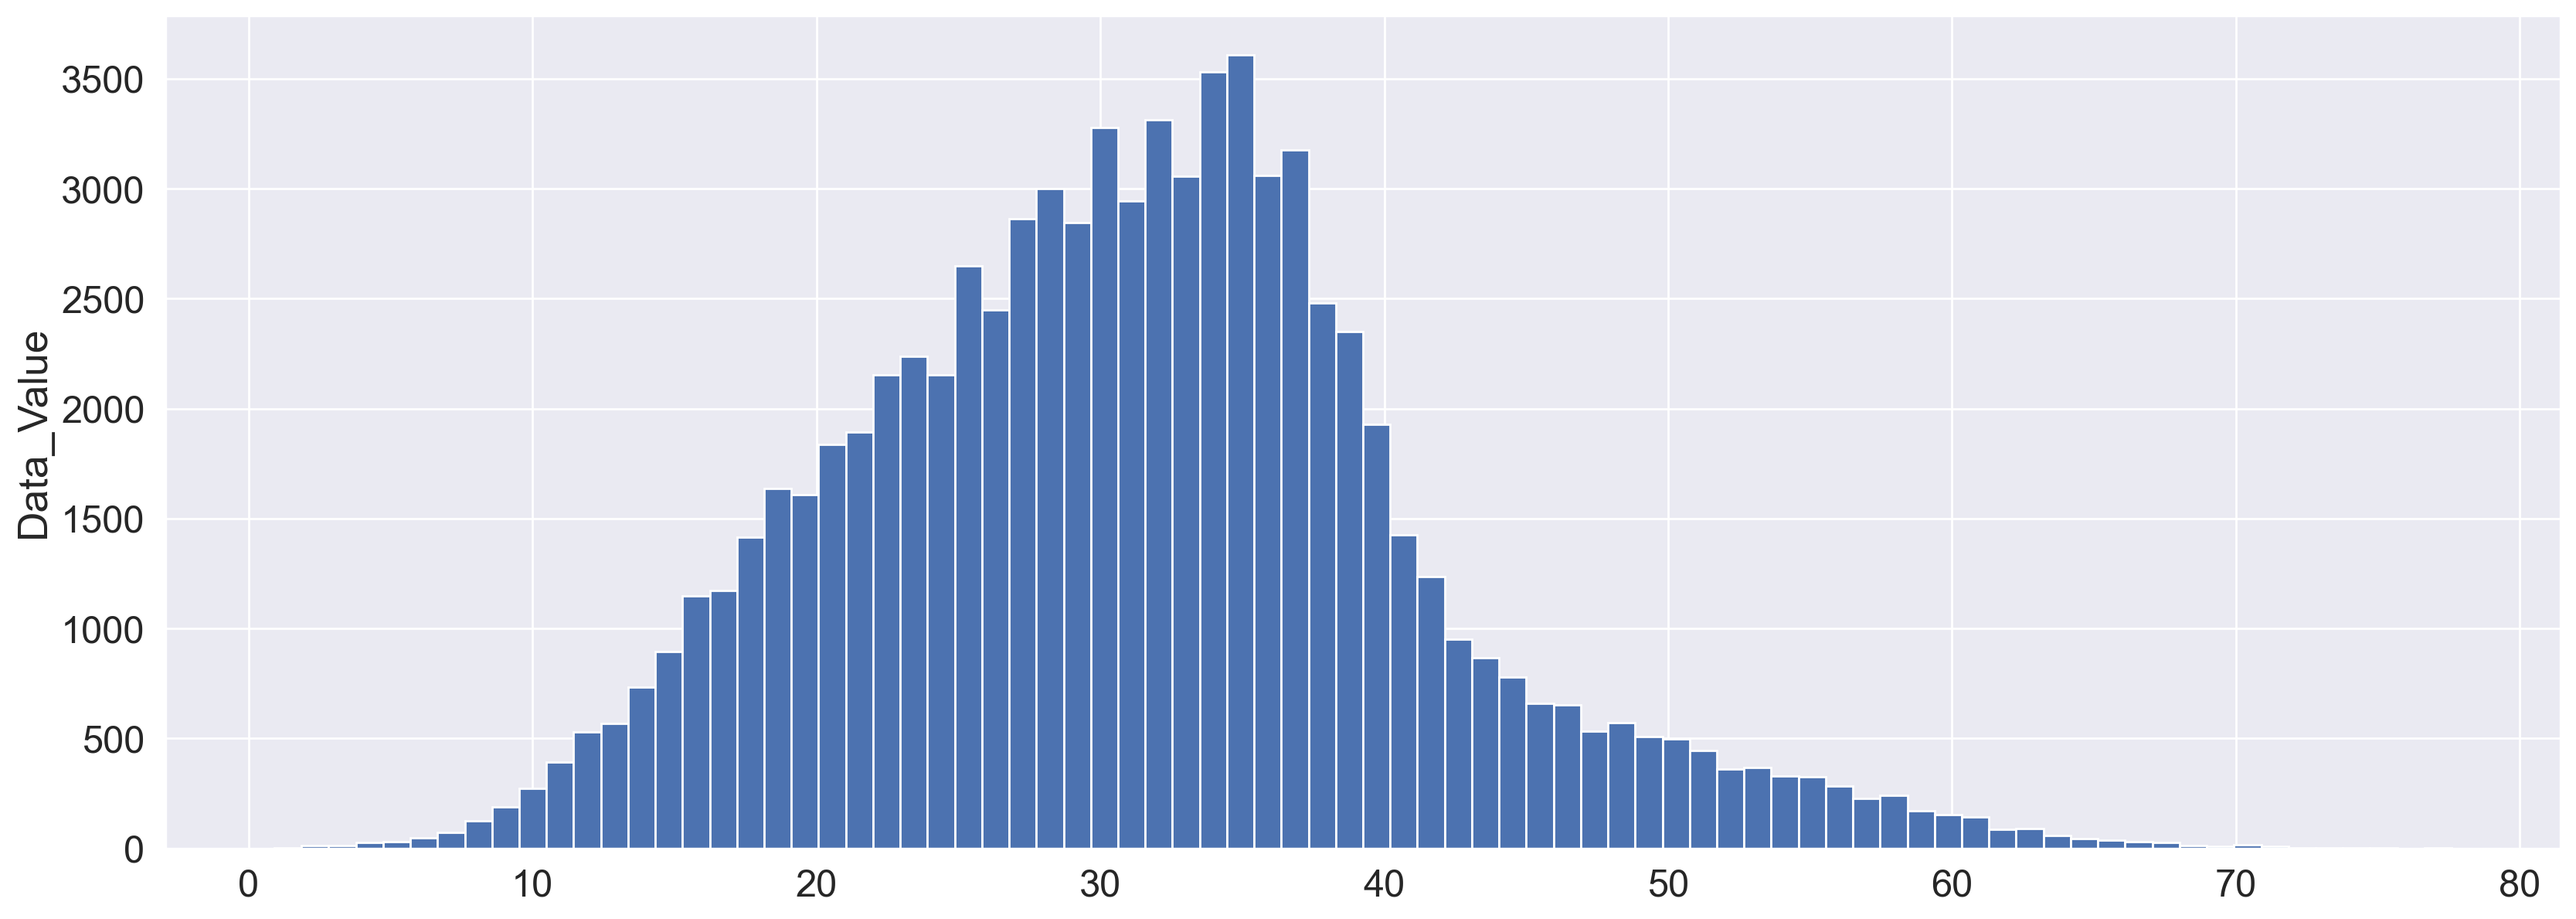

In [12]:
ax=df.Data_Value.hist(figsize=(20,7), bins=80)
ax.set_ylabel('Data_Value')
plt.show()

In [13]:
df = df.drop(['GeoLocation'],axis=1)

In [14]:
df.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'Question', 'Data_Value',
       'Age_Years', 'Education', 'Gender', 'Income', 'Race_Ethnicity',
       'LocationID'],
      dtype='object')

## 5. Questions about the data <a id="7"></a>

### 2011 to 2021

In [15]:
# Consider only obesity data
df = df[df.Question == 0]

In [16]:
df.YearStart.value_counts()

2016    1540
2017    1540
2018    1540
2021    1540
2014    1512
2015    1512
2020    1512
2019    1485
2013    1484
2012    1456
2011    1456
Name: YearStart, dtype: int64

In [17]:
Obesity_2011 = df[df.YearStart == 2011]
Obesity_2021 = df[df.YearStart == 2021]

### A. Dependence of obesity on Gender <a id="8"></a>

In [18]:
Obesity_2011_Gender = Obesity_2011.groupby('Gender')['Data_Value'].agg(['mean', 'std']).reset_index()
Obesity_2021_Gender = Obesity_2021.groupby('Gender')['Data_Value'].agg(['mean', 'std']).reset_index()

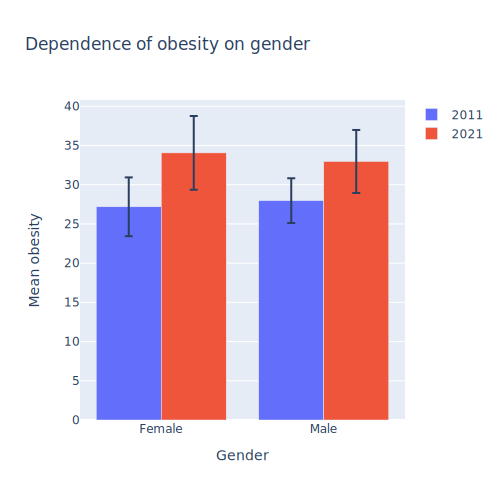

In [19]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='2011',
    x=Obesity_2011_Gender["Gender"], y=Obesity_2011_Gender["mean"],
    error_y=dict(type='data', array=Obesity_2011_Gender["std"])))
fig.add_trace(go.Bar(
    name='2021',
    x=Obesity_2021_Gender["Gender"], y=Obesity_2021_Gender["mean"],
    error_y=dict(type='data', array=Obesity_2021_Gender["std"])))
fig.update_layout(barmode='group', width=500,  height=500, title='Dependence of obesity on gender')
fig.update_yaxes(title_text="Mean obesity")
fig.update_xaxes(title_text="Gender")
fig.show(renderer="svg")

- There is no significant difference in obesity rates between genders.

### B. Dependence of obesity on Income  <a id="9"></a>

In [20]:
Obesity_2011_Income = Obesity_2011.groupby('Income')['Data_Value'].agg(['mean', 'std']).reset_index()
Obesity_2021_Income = Obesity_2021.groupby('Income')['Data_Value'].agg(['mean', 'std']).reset_index()

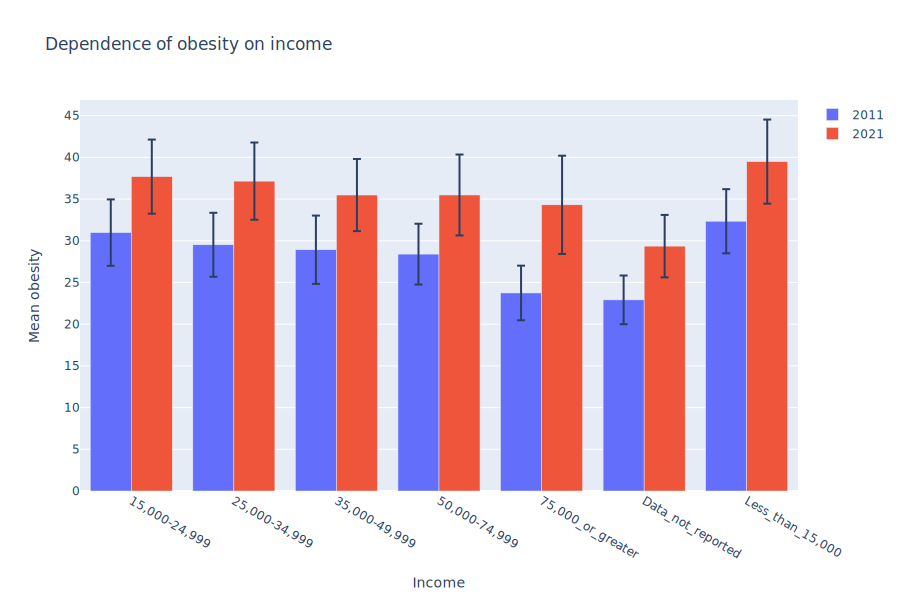

In [21]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='2011',
    x=Obesity_2011_Income["Income"], y=Obesity_2011_Income["mean"],
    error_y=dict(type='data', array=Obesity_2011_Income["std"])))
fig.add_trace(go.Bar(
    name='2021',
    x=Obesity_2021_Income["Income"], y=Obesity_2021_Income["mean"],
    error_y=dict(type='data', array=Obesity_2021_Income["std"])))
fig.update_layout(barmode='group', width=900,  height=600, title='Dependence of obesity on income')
fig.update_yaxes(title_text="Mean obesity")
fig.update_xaxes(title_text="Income")
fig.show(renderer="svg")

- There is significant difference in obesity rates between considarate years which has increased by 2021.
- By analyzing the mean, there is a possibility that income affects obesity. The higher the income, the lower the obesity on average for 2011.

### C. Dependence of obesity on Education  <a id="10"></a>
Consider how obesity is affected by education from those who did not finish high school to college graduates.

In [22]:
Obesity_2011_Education = Obesity_2011.groupby('Education')['Data_Value'].agg(['mean', 'std']).reset_index()
Obesity_2021_Education = Obesity_2021.groupby('Education')['Data_Value'].agg(['mean', 'std']).reset_index()

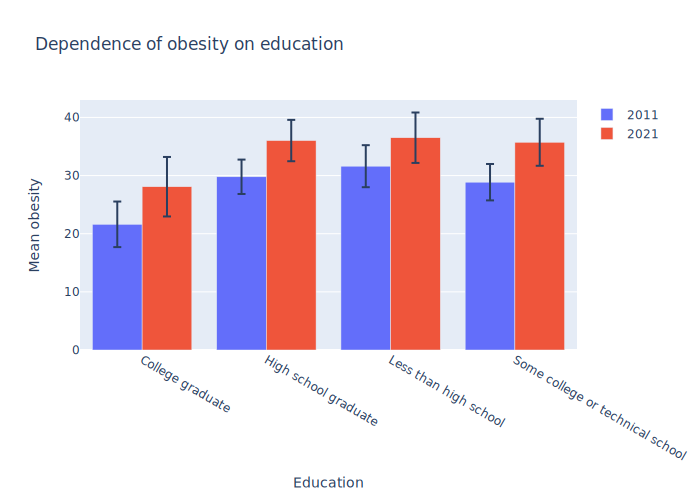

In [23]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='2011',
    x=Obesity_2011_Education["Education"], y=Obesity_2011_Education["mean"],
    error_y=dict(type='data', array=Obesity_2011_Education["std"])))
fig.add_trace(go.Bar(
    name='2021',
    x=Obesity_2021_Education["Education"], y=Obesity_2021_Education["mean"],
    error_y=dict(type='data', array=Obesity_2021_Education["std"])))
fig.update_layout(barmode='group', title='Dependence of obesity on education')
fig.update_yaxes(title_text="Mean obesity")
fig.update_xaxes(title_text="Education")

fig.show(renderer="svg")

- College graduates, on average, have a lower percentage of obesity compared to the other types of considered education. This can be clearly seen from the data of 2011.

### D. Dependence of obesity on Age  <a id="11"></a>
Consider how obesity depends on age for categories of 18 years and older.

In [24]:
Obesity_2011_Age = Obesity_2011.groupby('Age_Years')['Data_Value'].agg(['mean', 'std']).reset_index()
Obesity_2021_Age = Obesity_2021.groupby('Age_Years')['Data_Value'].agg(['mean', 'std']).reset_index()

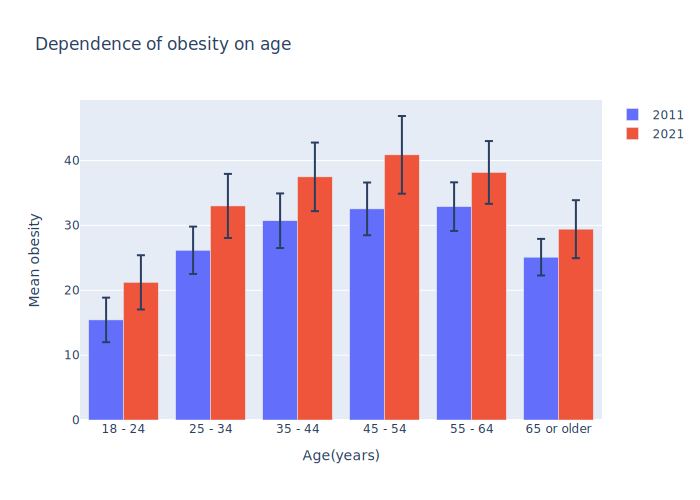

In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='2011',
    x=Obesity_2011_Age["Age_Years"], y=Obesity_2011_Age["mean"],
    error_y=dict(type='data', array=Obesity_2011_Age["std"])))
fig.add_trace(go.Bar(
    name='2021',
    x=Obesity_2021_Age["Age_Years"], y=Obesity_2021_Age["mean"],
    error_y=dict(type='data', array=Obesity_2021_Age["std"])))
fig.update_layout(barmode='group',  title='Dependence of obesity on age')
fig.update_yaxes(title_text="Mean obesity")
fig.update_xaxes(title_text="Age(years)")
fig.show(renderer="svg")


- The "18-24" group has the lowest percentage of obesity compared to other ages.
- Group "60 or older" have less obesity compared to ages "35 - 64".

### E. Dependence of obesity on Ethnicity <a id="12"></a>
Consider how obesity depends on ethnicity common in the USA.

In [26]:
Obesity_2011_Ethnicity = Obesity_2011.groupby('Race_Ethnicity')['Data_Value'].agg(['mean', 'std']).reset_index()
Obesity_2021_Ethnicity = Obesity_2021.groupby('Race_Ethnicity')['Data_Value'].agg(['mean', 'std']).reset_index()

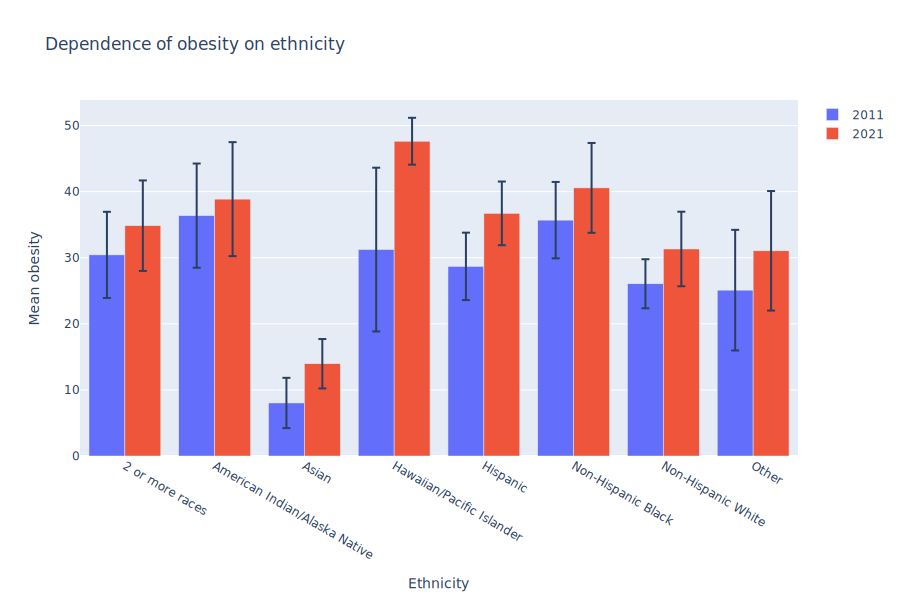

In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='2011',
    x=Obesity_2011_Ethnicity["Race_Ethnicity"], y=Obesity_2011_Ethnicity["mean"],
    error_y=dict(type='data', array=Obesity_2011_Ethnicity["std"])))
fig.add_trace(go.Bar(
    name='2021',
    x=Obesity_2021_Ethnicity["Race_Ethnicity"], y=Obesity_2021_Ethnicity["mean"],
    error_y=dict(type='data', array=Obesity_2021_Ethnicity["std"])))
fig.update_layout(barmode='group', width=900,  height=600, title='Dependence of obesity on ethnicity')
fig.update_yaxes(title_text="Mean obesity")
fig.update_xaxes(title_text="Ethnicity")

fig.show(renderer="svg")

- Asian Americans have a markedly lower percentage of obesity compared to other groups.
- At the same time, Hawaiians/Pacific Islanders outperform the rest in terms of obesity. Moreover, they show a statistically significant increase in obesity over the past 10 years.

### F. Dependence of obesity on a State (2021) <a id="13"></a>

In [28]:
Obesity_2021=Obesity_2021[~(Obesity_2021['LocationDesc']=='National')]
Obesity_2021=Obesity_2021[~(Obesity_2021['LocationDesc']=='Guam')]
Obesity_2021=Obesity_2021[~(Obesity_2021['LocationDesc']=='Puerto Rico')]
Obesity_2021_Location = Obesity_2021.groupby('LocationAbbr')['Data_Value'].agg(['mean', 'std']).reset_index()

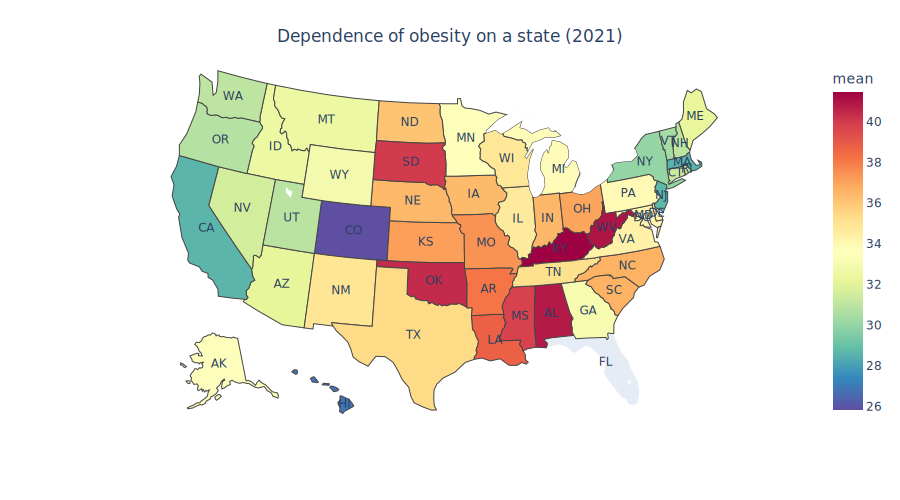

In [29]:
import plotly.io as pio
fig = px.choropleth(Obesity_2021_Location,
                    locations='LocationAbbr', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='mean',
                    color_continuous_scale="spectral_r", 
                    )
fig.add_scattergeo(
    locations=Obesity_2021_Location['LocationAbbr'],
    locationmode='USA-states',
    text=Obesity_2021_Location['LocationAbbr'],
    mode='text')

fig.update_layout(
    title={'text':'Dependence of obesity on a state (2021)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},autosize=False,
    width=900,
    height=500)
fig.show(renderer="svg")
#fig.write_image("Dependence_state.png")

In [30]:
Obesity_2021_Location_stat = Obesity_2021_Location.drop([9], axis=0)

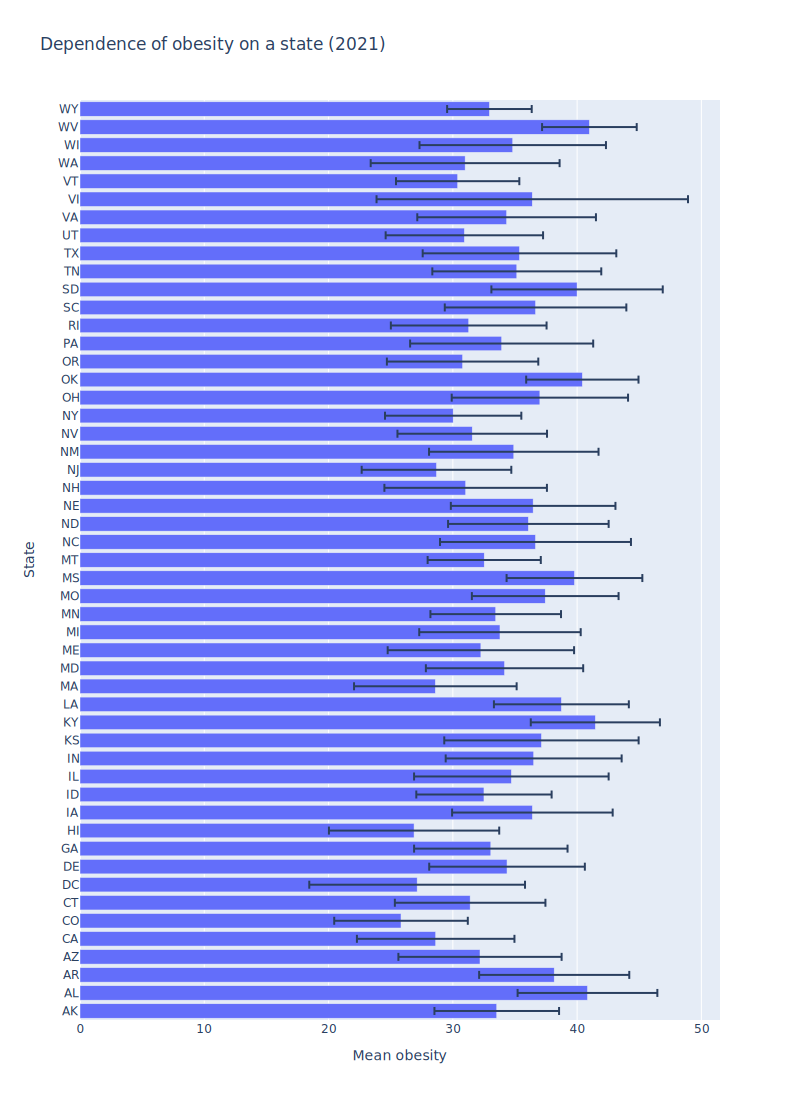

In [31]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='2021',
    x=Obesity_2021_Location_stat["mean"], y=Obesity_2021_Location_stat["LocationAbbr"],
    error_x=dict(type='data', array=Obesity_2021_Location_stat["std"]), orientation='h'))
fig.update_layout(barmode='group', width=800,  height=1100, title='Dependence of obesity on a state (2021)')
fig.update_xaxes(title_text="Mean obesity")
fig.update_yaxes(title_text="State")

fig.show(renderer="svg")

- From the obesity map for various states, it can be seen that the average percentage of obesity in the state of Colorado is significantly lower than the rest of the US states.

### G. Obesity over time <a id="14"></a>

In [32]:
df_Obesity = df[df.Question == 0].groupby('YearStart')['Data_Value'].agg(['mean', 'std']).reset_index()

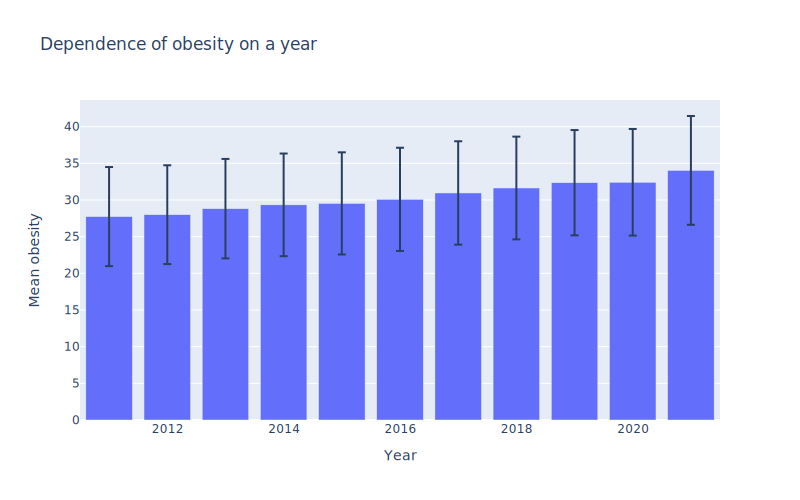

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_Obesity["YearStart"], y=df_Obesity["mean"],
    error_y=dict(type='data', array=df_Obesity["std"])))
fig.update_layout(barmode='group', width=800,  height=500, title='Dependence of obesity on a year')
fig.update_yaxes(title_text="Mean obesity")
fig.update_xaxes(title_text="Year")

fig.show(renderer="svg")

From the distribution of obesity from all groups of respondents, depending on the year, it is difficult to say statistically significant differences due to the large overlap of the standard deviation. But the general trend of the change in the mean with a standard deviation is towards an increase in the mean value of obesity over the years.

## 6. Summary <a id="15"></a>

This exploratory data analysis (EDA) focuses on the relationship between obesity rates and various demographic factors, including gender, income, education, age, ethnicity, and geographical location in the United States over the past 10 years.<br/>
- The analysis reveals that there is no significant difference in obesity rates between genders. <br/> 
- Higher income levels may have a small effect on reducing obesity rates. <br/> 
- College graduates, on average, have a lower percentage of obesity compared to those with other types of education. <br/> 
- In terms of age groups, the "18-24" age group has the lowest percentage of obesity compared to other ages, while the "60 or older" group has less obesity compared to ages "35-64". <br/>
- Ethnicity also plays a role in obesity rates, with Asian Americans having a markedly lower percentage of obesity compared to other groups, while Hawaiians/Pacific Islanders have higher rates of obesity. <br/>
- Geographically, the state of Colorado has significantly lower obesity rates than the rest of the US states. <br/>
- The analysis also suggests that there is a general trend of increasing obesity rates over the years, but due to the large overlap of standard deviation, it is difficult to establish statistically significant differences. But the detailed study of obesity in considered demographic groups shows an increase in obesity over the past 10 years.




